<a href="https://colab.research.google.com/github/Reape4er/python-for-bigdata/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [1]:
import rasterio

dem_url = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
with rasterio.open(dem_url) as src:
    print(f"Successfully opened {dem_url}")

Successfully opened https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [2]:
with rasterio.open(dem_url) as src:
    print("Координатная система (CRS):")
    print(src.crs)
    print("Разрешение (Resolution):")
    print(src.res)
    print("Границы (Bounds):")
    print(src.bounds)
    print("Количество каналов (Number of bands):")
    print(src.count)
    print("Типы данных каналов (Band data types):")
    print(src.dtypes)

Координатная система (CRS):
EPSG:3857
Разрешение (Resolution):
(90.0, 89.99579177642138)
Границы (Bounds):
BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)
Количество каналов (Number of bands):
1
Типы данных каналов (Band data types):
('int16',)


3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [3]:
with rasterio.open(dem_url) as src:
    print(f"Ширина растра (Width): {src.width}")
    print(f"Высота растра (Height): {src.height}")
    print(f"Типы данных пикселей (Pixel data types): {src.dtypes}")

Ширина растра (Width): 4269
Высота растра (Height): 3113
Типы данных пикселей (Pixel data types): ('int16',)


---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


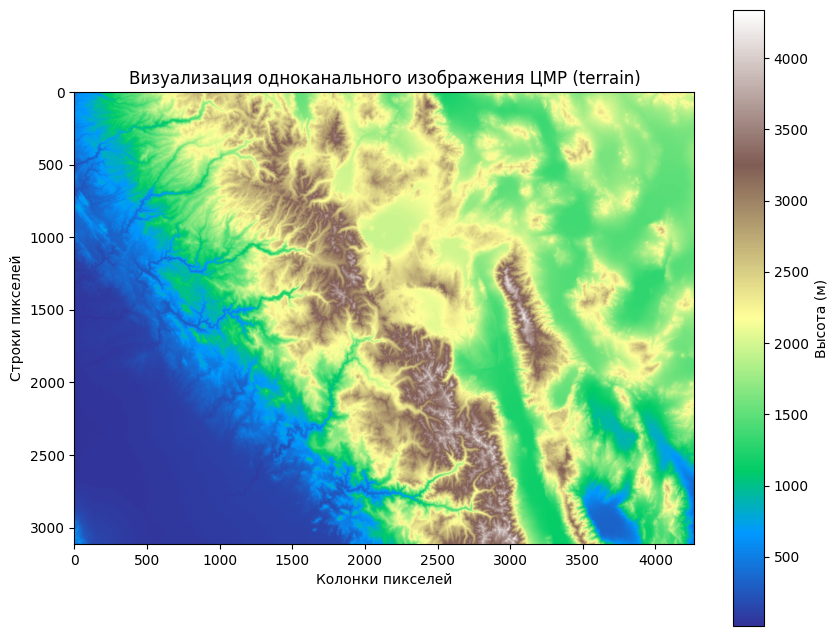

In [4]:
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open(dem_url) as src:
    dem_band = src.read(1)

    plt.figure(figsize=(10, 8))
    plt.imshow(dem_band, cmap='terrain')
    plt.colorbar(label='Высота (м)')
    plt.title('Визуализация одноканального изображения ЦМР (terrain)')
    plt.xlabel('Колонки пикселей')
    plt.ylabel('Строки пикселей')
    plt.show()

2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


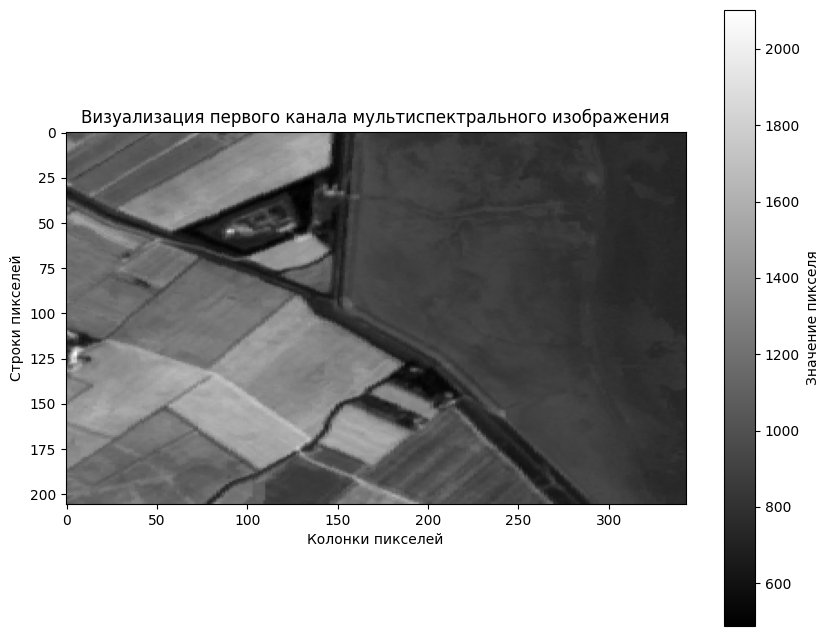

In [5]:
multispectral_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

with rasterio.open(multispectral_url) as src:
    multispectral_band_1 = src.read(1)

    plt.figure(figsize=(10, 8))
    plt.imshow(multispectral_band_1, cmap='gray')
    plt.colorbar(label='Значение пикселя')
    plt.title('Визуализация первого канала мультиспектрального изображения')
    plt.xlabel('Колонки пикселей')
    plt.ylabel('Строки пикселей')
    plt.show()

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

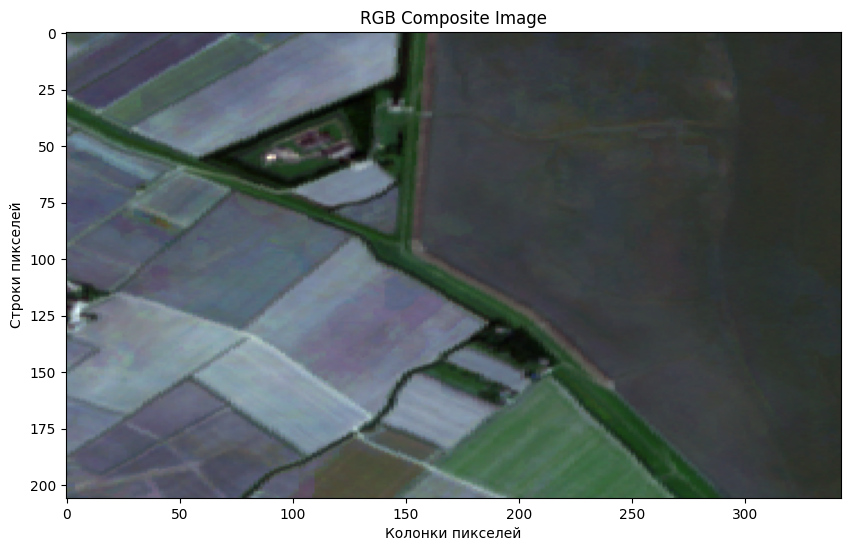

In [6]:
multispectral_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

with rasterio.open(multispectral_url) as src:
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)

    red_norm = normalize(red)
    green_norm = normalize(green)
    blue_norm = normalize(blue)

    rgb_composite = np.stack([red_norm, green_norm, blue_norm], axis=-1)

    plt.figure(figsize=(10, 8))
    plt.imshow(rgb_composite)
    plt.title('RGB Composite Image')
    plt.xlabel('Колонки пикселей')
    plt.ylabel('Строки пикселей')
    plt.show()

---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

multispectral_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

with rasterio.open(multispectral_url) as src:
    all_bands = src.read()

    rows_slice = slice(0, 100)
    cols_slice = slice(0, 150)

    clipped_multispectral = all_bands[:, rows_slice, cols_slice]

    print(f"Original image shape: {all_bands.shape}")
    print(f"Clipped image shape: {clipped_multispectral.shape}")

Original image shape: (4, 206, 343)
Clipped image shape: (4, 100, 150)


2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

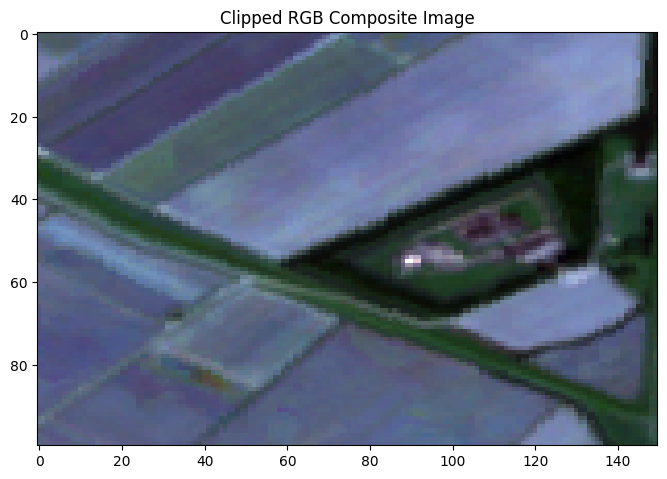

In [19]:
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

if clipped_multispectral.shape[0] >= 3:
    red_clipped = clipped_multispectral[2, :, :]
    green_clipped = clipped_multispectral[1, :, :]
    blue_clipped = clipped_multispectral[0, :, :]

    red_clipped_norm = normalize(red_clipped)
    green_clipped_norm = normalize(green_clipped)
    blue_clipped_norm = normalize(blue_clipped)

    rgb_clipped_composite = np.stack([red_clipped_norm, green_clipped_norm, blue_clipped_norm], axis=-1)

    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_clipped_composite)
    plt.title('Clipped RGB Composite Image')
    plt.show()
else:
    print("Недостаточно каналов для создания RGB композита из обрезанного изображения.")
    plt.figure(figsize=(8, 6))
    plt.imshow(normalize(clipped_multispectral[0, :, :]), cmap='gray')
    plt.title('Clipped Single Band Image')
    plt.colorbar(label='Нормализованное значение пикселя')
    plt.show()

3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [10]:
output_filename = "clipped_multispectral.tif"

with rasterio.open(multispectral_url) as src:
    profile = src.profile

    rows_slice = slice(0, 100)
    cols_slice = slice(0, 150)

    profile.update({
        'height': clipped_multispectral.shape[1],
        'width': clipped_multispectral.shape[2],
        'transform': src.window_transform(rasterio.windows.Window.from_slices(rows_slice, cols_slice)),
        'count': clipped_multispectral.shape[0],
        'dtype': clipped_multispectral.dtype
    })

    with rasterio.open(output_filename, 'w', **profile) as dst:
        dst.write(clipped_multispectral)

print(f"Обрезанный растр сохранен в файл: {output_filename}")

Обрезанный растр сохранен в файл: clipped_multispectral.tif


---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [11]:
multispectral_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

with rasterio.open(multispectral_url) as src:
    green_band = src.read(2)
    nir_band = src.read(4)

    print(f"Green band shape: {green_band.shape}")
    print(f"NIR band shape: {nir_band.shape}")

Green band shape: (206, 343)
NIR band shape: (206, 343)


2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [12]:
epsilon = 1e-8
ndwi = (green_band.astype(float) - nir_band.astype(float)) / (green_band.astype(float) + nir_band.astype(float) + epsilon)

print(f"NDWI band shape: {ndwi.shape}")
print(f"NDWI min value: {ndwi.min():.4f}")
print(f"NDWI max value: {ndwi.max():.4f}")

NDWI band shape: (206, 343)
NDWI min value: -0.6218
NDWI max value: 0.4772


3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


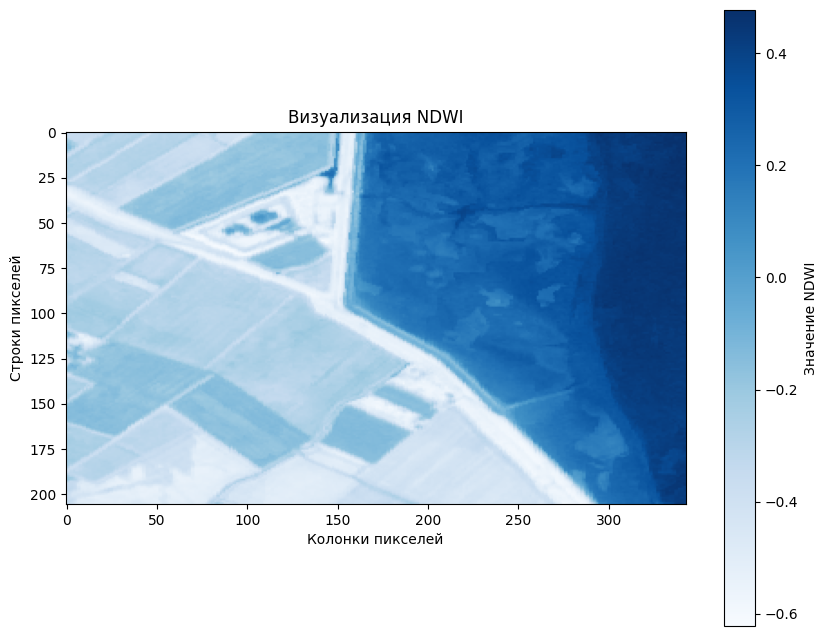

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(ndwi, cmap='Blues')
plt.colorbar(label='Значение NDWI')
plt.title('Визуализация NDWI')
plt.xlabel('Колонки пикселей')
plt.ylabel('Строки пикселей')
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [14]:
output_ndwi_filename = "ndwi.tif"

with rasterio.open(multispectral_url) as src:
    profile = src.profile

    profile.update({
        'dtype': ndwi.dtype,
        'count': 1,
        'nodata': None
    })

    with rasterio.open(output_ndwi_filename, 'w', **profile) as dst:
        dst.write(ndwi, 1)

print(f"Изображение NDWI сохранено в файл: {output_ndwi_filename}")

Изображение NDWI сохранено в файл: ndwi.tif


---



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [16]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np

dem_url = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
output_crs = 'EPSG:4326'

with rasterio.open(dem_url) as src:
    reproject_transform, reproject_width, reproject_height = rasterio.warp.calculate_default_transform(
        src.crs, output_crs, src.width, src.height, *src.bounds)

    reprojected_dem_data = np.empty((reproject_height, reproject_width), dtype=src.dtypes[0])

    reproject(
        source=rasterio.band(src, 1),
        destination=reprojected_dem_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=reproject_transform,
        dst_crs=output_crs,
        resampling=Resampling.nearest,
        num_threads=4
    )

    print(f"Исходное CRS: {src.crs}")
    print(f"Целевое CRS: {output_crs}")
    print(f"Форма перепроецированного растра: {reprojected_dem_data.shape}")

Исходное CRS: EPSG:3857
Целевое CRS: EPSG:4326
Форма перепроецированного растра: (2642, 4575)


2. Сохраните перепроецированный растр в новый файл GeoTIFF с именем `reprojected_dem.tif`.


In [17]:
output_reprojected_filename = "reprojected_dem.tif"

with rasterio.open(dem_url) as src:
    profile = src.profile.copy()

    profile.update({
        'crs': output_crs,
        'transform': reproject_transform,
        'width': reproject_width,
        'height': reproject_height,
        'dtype': reprojected_dem_data.dtype,
        'count': 1
    })

    with rasterio.open(output_reprojected_filename, 'w', **profile) as dst:
        dst.write(reprojected_dem_data, 1)

print(f"Перепроецированный растр сохранен в файл: {output_reprojected_filename}")

Перепроецированный растр сохранен в файл: reprojected_dem.tif


3. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

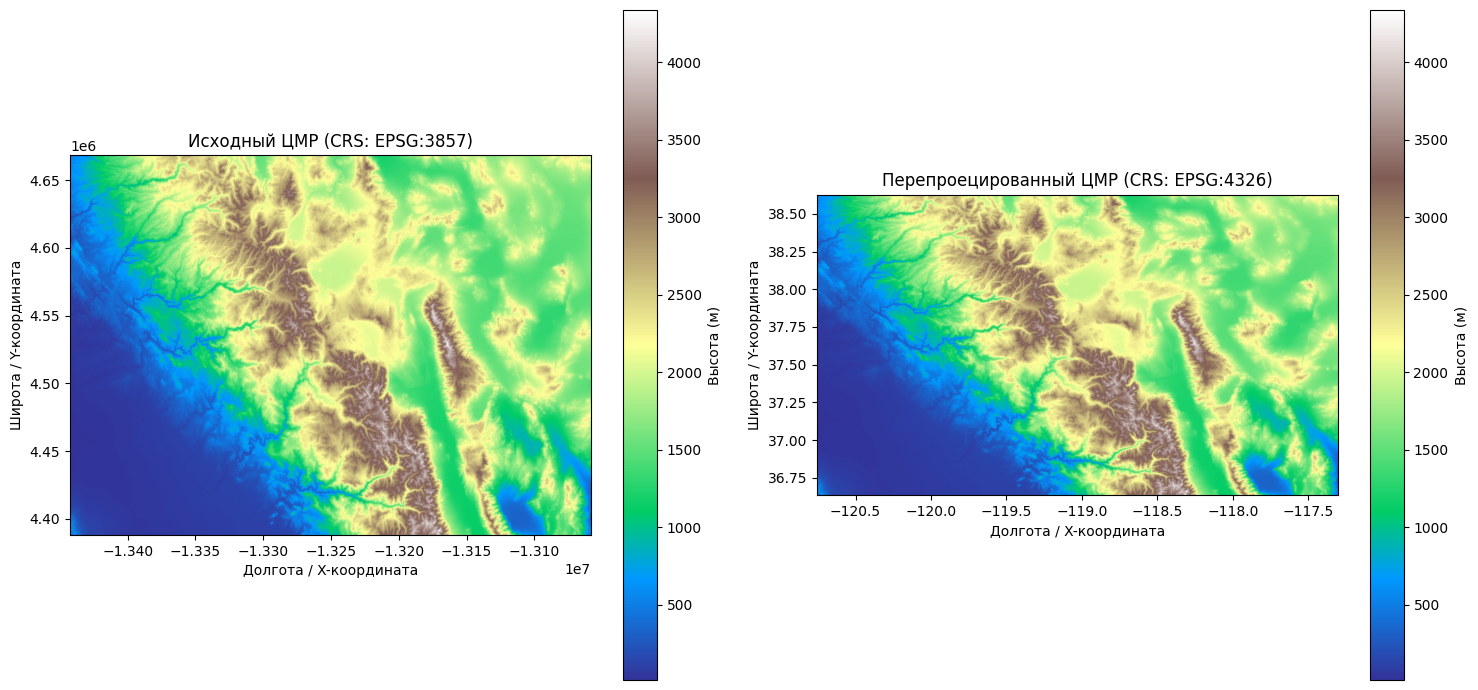

In [18]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open(dem_url) as src_original:
    original_dem_data = src_original.read(1)
    original_extent = [src_original.bounds.left, src_original.bounds.right, src_original.bounds.bottom, src_original.bounds.top]
    original_crs = src_original.crs

with rasterio.open(output_reprojected_filename) as src_reprojected:
    reprojected_dem_data_from_file = src_reprojected.read(1)
    reprojected_extent = [src_reprojected.bounds.left, src_reprojected.bounds.right, src_reprojected.bounds.bottom, src_reprojected.bounds.top]
    reprojected_crs = src_reprojected.crs

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(original_dem_data, cmap='terrain', extent=original_extent)
plt.colorbar(label='Высота (м)')
plt.title(f'Исходный ЦМР (CRS: {original_crs})')
plt.xlabel('Долгота / X-координата')
plt.ylabel('Широта / Y-координата')

plt.subplot(1, 2, 2)
plt.imshow(reprojected_dem_data_from_file, cmap='terrain', extent=reprojected_extent)
plt.colorbar(label='Высота (м)')
plt.title(f'Перепроецированный ЦМР (CRS: {reprojected_crs})')
plt.xlabel('Долгота / X-координата')
plt.ylabel('Широта / Y-координата')

plt.tight_layout()
plt.show()

---